In [65]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./houses_price/train.csv')
data_test = pd.read_csv('./houses_price/test.csv')

TARGET_COLUMN = 'SalePrice'

categorical_fields = data.select_dtypes(exclude=[np.number]).columns
print(categorical_fields)

num_fields = data.select_dtypes(include=[np.number]).drop(TARGET_COLUMN, 1).columns
print(num_fields)

y = data[TARGET_COLUMN]


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [67]:
def preprocessing_data():
    for col in categorical_fields:
        data[col].fillna('default', inplace=True)
        data_test[col].fillna('default', inplace=True)

    for col in num_fields:
        print(col)
        data[col].fillna(0, inplace=True)
        data_test[col].fillna(0, inplace=True)

    encode = LabelEncoder()
    for col in categorical_fields:
        data[col] = encode.fit_transform(data[col])
        data_test[col] = encode.fit_transform(data_test[col])

    data[TARGET_COLUMN].fillna(0, inplace=True)

preprocessing_data()

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


In [68]:
def get_feature_importance(features):
    n_estimators = 10000
    random_state = 0
    n_jobs = 5

    x_train = data[features]
    y_train = data.iloc[:, -1]

    feat_labels = data.columns[1:]
    forest = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=n_jobs
    )
    forest.fit(x_train, y_train)
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]

    for f in range(x_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                                importances[indices[f]]))

    ## Plot the feature importance in the bar chart.
    plt.title("Feature Importance")
    plt.bar(range(x_train.shape[1]), importances[indices], color='lightblue', align='center')
    plt.xticks(range(x_train.shape[1]), feat_labels[indices], rotation=90)
    plt.xlim([-1, x_train.shape[1]])
    plt.tight_layout()
    plt.show()

Getting the features to build the model...
List of Features : ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCond

 1) GarageQual                     0.580469
 2) Heating                        0.109808
 3) MiscFeature                    0.039735
 4) MSZoning                       0.035255
 5) Utilities                      0.027253
 6) MSSubClass                     0.022522
 7) BsmtFinType1                   0.019871
 8) BsmtExposure                   0.015223
 9) BsmtHalfBath                   0.013125
10) YrSold                         0.009042
11) GarageFinish                   0.007333
12) Fence                          0.007198
13) SaleType                       0.006517
14) TotalBsmtSF                    0.005853
15) Functional                     0.005617
16) HalfBath                       0.005422
17) BsmtQual                       0.005305
18) HouseStyle                     0.005180
19) BsmtUnfSF                      0.004945
20) MoSold                         0.004741
21) GarageCars                     0.004653
22) BldgType                       0.004566
23) GarageArea                  

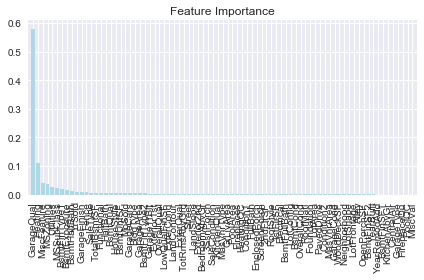

In [69]:
def get_features():
    print("Getting the features to build the model...")
    l1 = list(data.columns.values)
    l2 = list(data_test.columns.values)
    fields = list(set(l1) & set(l2))
    fields.remove('Id')
    list_of_features = sorted(fields)
    print("List of Features :", list_of_features)
    return list_of_features

features = get_features()
get_feature_importance(features)

In [70]:
def create_model(list_of_features):
    n_estimators = 10000  # Number of Trees in the forest
    n_jobs = 5  ## Number of parallel jobs
    x_train = data[list_of_features]  ## Training set of features
    y_train = data.iloc[:, -1]  ## target in traunung set
    x_test = data_test[list_of_features]  ## Test set of feature for validation
    random_state = 0
    ## Model creation.

    print(
        "Running random forest to create the model with parameters.. n_estimators:{} random_state :{} n_jobs :{}".format(
            n_estimators, random_state, n_jobs))
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=n_jobs)
    forest.fit(x_train, y_train)  ## Fit the model
    Y_pred = forest.predict(x_test.as_matrix())  ## Get the prediction on test data

    i = 0
    file = open('submission.csv', 'w')
    header = "Id,SalePrice"
    header = header + '\n'
    file.write(header)
    for id in (data_test['Id']):
        str = "{},{}".format(id, Y_pred[i])
        str = str + '\n'
        # print(str)
        file.write(str)
        i += 1
        
create_model(features)

Running random forest to create the model with parameters.. n_estimators:10000 random_state :0 n_jobs :5
